## 总结

关于这个向量机。如果把所有的特征，组成一个向量，然后组成一个向量空间。最后，用一个平面(纬度比空间低一个纬度的空间)来区分这些向量。然后我们看到的就是投影。但是我没法证明，
也不能用公式表述。

然后本章，就是把这些不同的向量机给我展现一下。看下来，关键是几个变量

- C
- Kernel

## linear SVM

线性的svm，本质就是`Ax=0`求解。从线性代数来说，解会形成一个向量空间。然后这个空间中`||w||`最小的值。其实这个从线性代数的角度理解。而我的
线性代数，是四分之一桶水，说不清楚，就是脑子里面的图像。  
然后这些从二维到三维的可以方便的有几何图像来理解。到了更好纬度，也就是有更多特征的时候，估计只能凭借这些理解了。

然后就文中的例子来说。边界线，在几何上面来理解。也就是分割线。实际上，就是进行了**空间分割**

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import  LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5,1.7]])


array([1.])

## Nonlinear SVM classification

其实这里，我有点理解 polynomial feature的作用。
简单的来说，就是你有一杯可乐。一杯牛奶。你单独喝，只有一种口味。但是你1/2的可乐和1/2的牛奶。1/3的可乐，2/3的可乐。就变成3种饮料。

In [9]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100,noise=0.15)
ploynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge"))
])

ploynomial_svm_clf.fit(X,y)

/Users/chandlersong/.conda/envs/MLBase/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [10]:
ploynomial = PolynomialFeatures(degree=3)
ploynomial.fit_transform(X,y).shape

(100, 10)

- 下面介绍两个常用的kernel。其他kernel用的不多。
- 首先尝试用LinearSVC。这个快。

### polynomial Kernel

总结一下吧

1. polynomial feature这种技术很NB。因为可以"增加" feature。但是对性能要求很高。
2. 缺点是性能很糟糕。
3. 这里面有一种核技术(kernel trick)获得收益的时候，不会有太大的性能损耗。

然后用ploynomial的时候，如果overfitting，就减少degree。反之，则减少degree。

cef0受高阶还是低阶函数影响。我真的不知道。


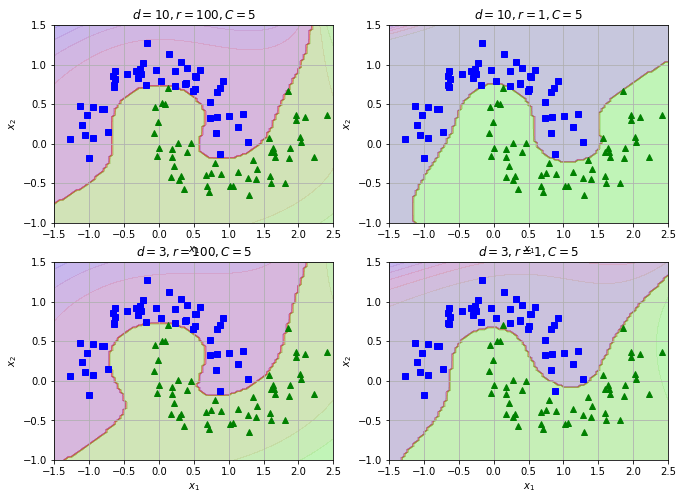

In [14]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt



def plot_dataset(ax, X, y, axes):
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    ax.axis(axes)
    ax.grid(True, which='both')
    ax.set(xlabel=r"$x_1$", ylabel=r"$x_2$")

def plot_predictions(ax,clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1= np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    ax.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    ax.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.1)
    
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def create_svc_ploy_model(d,r,C):
    ploy_kernel_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly",degree=d,coef0=r,C=C))
    ])
    
    ploy_kernel_svm_clf.fit(X,y)
    return ploy_kernel_svm_clf

fig, axs = plt.subplots(2,2,figsize=(11, 8))
axis_size = [-1.5,2.5,-1,1.5]
plot_predictions(axs[0,0],create_svc_ploy_model(10,100,5),axis_size)
axs[0,0].set_title(r"$d=10, r=100, C=5$",)
plot_predictions(axs[0,1],create_svc_ploy_model(10,1,5),axis_size)
axs[0,1].set_title(r"$d=10, r=1, C=5$",)
plot_predictions(axs[1,0],create_svc_ploy_model(3,100,5),axis_size)
axs[1,0].set_title(r"$d=3, r=100, C=5$",)
plot_predictions(axs[1,1],create_svc_ploy_model(3,1,5),axis_size)
axs[1,1].set_title(r"$d=3, r=1, C=5$",)

for ax in axs.ravel():
    plot_dataset(ax,X,y,axis_size)



plt.show()

### Gaussian RBF

另一种处理方式。看那个公式，我已经没有感觉了。简单的来说，从逻辑上来说，就是为了确定一个点，然后计算和这个点的距离0为最远，1为最近的函数。
类似于这样，就把所有的数据变成**钟形**了。和二次一样。



- 其实所有的计算，都是线性代数的做法。
- 和ploy一样。他也有其kernel函数

- gramma($\gamma$)类似与上文中degree是一个作用。

In [12]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

## SVM Regression

简单的来说，就是变换目标。使得定，精良在这个街道上面。

## under hood

前面看懂了。其实就是一个$Ax=b$的问题，然后求解了一个空间。而这个空间中来的斜率和第一章的街成反比

但是有后面完全看不懂。找了一些资料。完全看不懂什么是什么。就是感觉是一个已知方程的优化问题。

- [wiki上的说明](https://zh.wikipedia.org/wiki/%E4%BA%8C%E6%AC%A1%E8%A7%84%E5%88%92)
- [一些资料](https://cbb1996.com/2019/07/20/3-convexop/)


-  `convex quadratic optimization problems`
-  `The dual problem`
-  `kernelized SVM`
